## Bigmart Vendas
O varejo é outro setor que utiliza extensivamente a análise para otimizar os processos de negócios. Tarefas como posicionamento de produtos, gerenciamento de inventário, ofertas personalizadas, empacotamento de produtos etc. estão sendo manipuladas de maneira inteligente usando técnicas de ciência de dados. Como o nome sugere, esses dados são compostos por registros de transações de uma loja de vendas. Este é um problema de regressão.

In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline

In [83]:
# Os dados possuem 14204 linhas e 12 variáveis.
df = pd.read_csv('bases/marketSales.csv')
print(len(df), 'linhas')
df.head()

14204 linhas


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
# Limpeza dos valores nulos
df.dropna(how='any',inplace=True)
# Retirar o campo Item_Identifier
df = df.drop(columns=['Item_Identifier','Outlet_Identifier'], axis=1)
print(len(df), 'linhas')
df.head()

4650 linhas


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [85]:
# Transformação das variáveis em Categóricas
df['Item_Fat_Content'] = df.Item_Fat_Content.astype('category')
df['Item_Type'] = df.Item_Type.astype('category')
df['Outlet_Size'] = df.Outlet_Size.astype('category')
df['Outlet_Location_Type'] = df.Outlet_Location_Type.astype('category')
df['Outlet_Type'] = df.Outlet_Type.astype('category')
print(df.dtypes)

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object


In [86]:
print("Fat:", df['Item_Fat_Content'].cat.categories)
print("Item:", df['Item_Type'].cat.categories)
print("OutSize:", df['Outlet_Size'].cat.categories)
print("OutLoc:", df['Outlet_Location_Type'].cat.categories)
print("OutType:", df['Outlet_Type'].cat.categories)

Fat: Index(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype='object')
Item: Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')
OutSize: Index(['High', 'Medium', 'Small'], dtype='object')
OutLoc: Index(['Tier 1', 'Tier 2', 'Tier 3'], dtype='object')
OutType: Index(['Supermarket Type1', 'Supermarket Type2'], dtype='object')


In [87]:
# De categóricas para numéricas
le_Item_Type = LabelEncoder()
le_Outlet_Size = LabelEncoder()
le_Outlet_Location_Type = LabelEncoder()
le_Outlet_Type = LabelEncoder()
df['Item_Type'] = le_Item_Type.fit_transform(df['Item_Type'])
df['Outlet_Size'] = le_Outlet_Size.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le_Outlet_Size.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le_Outlet_Type.fit_transform(df['Outlet_Type'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,4,249.8092,1999,1,0,0,3735.1380
1,5.920,Regular,0.019278,14,48.2692,2009,1,2,1,443.4228
2,17.500,Low Fat,0.016760,10,141.6180,1999,1,0,0,2097.2700
4,8.930,Low Fat,0.000000,9,53.8614,1987,0,2,0,994.7052
5,10.395,Regular,0.000000,0,51.4008,2009,1,2,1,556.6088


In [88]:
cleanup_nums = {'Item_Fat_Content': {'LF': 1, 'Low Fat': 1, 'low fat': 1, 'reg': 2, 'Regular': 2}}
df.replace(cleanup_nums, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,0,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,1,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,0,2097.2700
4,8.930,1,0.000000,9,53.8614,1987,0,2,0,994.7052
5,10.395,2,0.000000,0,51.4008,2009,1,2,1,556.6088


In [89]:
print(df.dtypes)
df.describe()

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000,4650.00000,4650.000000
mean,12.898675,1.353978,0.060700,7.223011,141.716328,1999.190538,1.199570,1.000000,0.19957,2272.037489
std,4.670973,0.478254,0.044607,4.211951,62.420534,7.388800,0.748814,0.894523,0.39972,1497.964740
min,4.555000,1.000000,0.000000,0.000000,31.490000,1987.000000,0.000000,0.000000,0.00000,69.243200
25%,8.770000,1.000000,0.025968,4.000000,94.409400,1997.000000,1.000000,0.000000,0.00000,1125.202000
50%,12.650000,1.000000,0.049655,6.000000,142.979900,1999.000000,1.000000,1.000000,0.00000,1939.808300
75%,17.000000,2.000000,0.088736,10.000000,186.614150,2004.000000,2.000000,2.000000,0.00000,3111.616300
max,21.350000,2.000000,0.188323,15.000000,266.888400,2009.000000,2.000000,2.000000,1.00000,10256.649000


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Item_Outlet_Sales'],axis=1), df['Item_Outlet_Sales'], test_size = .2)
print('Amostra de Treino:', X_train.shape)
print('Amostra de Teste:', X_test.shape)

Amostra de Treino: (3720, 9)
Amostra de Teste: (930, 9)


In [98]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.47047292345648006

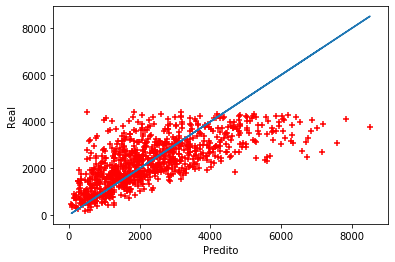

In [77]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, c = 'red', marker='+')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()